In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
cp_final = pd.read_csv(f'Preproces_dataset.csv',delimiter=',')
cp_final

C:\Users\acris\AppData\Local\Temp\ipykernel_11280\1368421617.py:1: DtypeWarning: Columns (13,20) have mixed types. Specify dtype option on import or set low_memory=False.
  cp_final = pd.read_csv(f'Preproces_dataset.csv',delimiter=',')


,id_cliente,loan_status,loan_amnt,installment,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,mths_since_last_delinq,total_pymnt,recoveries,collection_recovery_fee,last_pymnt_d,settlement_status,application_type,tot_hi_cred_lim,mal_pagador
0,0,Current,2500,84.92,36 months,Chef,10+ years,RENT,55000.0,Not Verified,...,2001-04-01,0,167.020000,0.0,0.0,2019-02-01,NaN,Individual,60124.0,0
1,1,Current,30000,777.23,60 months,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,...,1987-06-01,71,1507.110000,0.0,0.0,2019-02-01,NaN,Individual,372872.0,0
2,2,Current,5000,180.69,36 months,Administrative,6 years,MORTGAGE,59280.0,Source Verified,...,2011-04-01,0,353.890000,0.0,0.0,2019-02-01,NaN,Individual,136927.0,0
3,3,Current,4000,146.51,36 months,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,...,2006-02-01,0,286.710000,0.0,0.0,2019-02-01,NaN,Individual,385183.0,0
4,4,Current,30000,731.78,60 months,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,...,2000-12-01,0,1423.210000,0.0,0.0,2019-02-01,NaN,Individual,157548.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255885,2260663,Current,12000,279.72,60 months,house keeper,10+ years,MORTGAGE,58000.0,Not Verified,...,2004-01-01,0,5360.960000,0.0,0.0,2019-02-01,NaN,Individual,73948.0,0
2255886,2260664,Fully Paid,12000,358.01,60 months,Skilled Labor,< 1 year,MORTGAGE,30000.0,Not Verified,...,2003-03-01,13,14499.802172,0.0,0.0,2018-08-01,NaN,Joint App,382275.0,0
2255887,2260665,Current,10000,332.10,36 months,Teacher,10+ years,OWN,64000.0,Source Verified,...,1995-02-01,0,5306.940000,0.0,0.0,2019-02-01,NaN,Individual,203417.0,0
2255888,2260666,Current,12000,327.69,60 months,NaN,NaN,RENT,60000.0,Not Verified,...,2003-07-01,7,5207.290000,0.0,0.0,2019-02-01,NaN,Individual,118975.0,0


In [4]:
cp_final['mal_pagador'].value_counts(normalize=True)

mal_pagador
0    0.873764
1    0.126236
Name: proportion, dtype: float64

In [5]:
cp_final['annual_inc_int'] = cp_final['annual_inc'].apply(lambda x: 460 if x==0 else x)

In [6]:
cp_final["ratio_sobreendeudamiento"] = cp_final["installment"]/(cp_final['annual_inc_int']/12)

In [7]:
cp_final[["annual_inc_int","annual_inc","ratio_sobreendeudamiento"]]

,annual_inc_int,annual_inc,ratio_sobreendeudamiento
0,55000.0,55000.0,0.018528
1,90000.0,90000.0,0.103631
2,59280.0,59280.0,0.036577
3,92000.0,92000.0,0.019110
4,57250.0,57250.0,0.153386
...,...,...,...
2255885,58000.0,58000.0,0.057873
2255886,30000.0,30000.0,0.143204
2255887,64000.0,64000.0,0.062269
2255888,60000.0,60000.0,0.065538


In [8]:
cp_final["cortes_ratio_sobreendeudamiento"] = pd.cut(cp_final['ratio_sobreendeudamiento'] ,bins=[0,0.05,0.1,0.2,0.5,0.8,1])

In [9]:
tabla1 = pd.crosstab(cp_final['cortes_ratio_sobreendeudamiento'], cp_final['mal_pagador'])
tabla1["ratio_malos"] = tabla1[1]/(tabla1[0]+tabla1[1])
tabla1

mal_pagador,0,1,ratio_malos
cortes_ratio_sobreendeudamiento,,,
"(0.0, 0.05]",597857,57852,0.088228
"(0.05, 0.1]",844664,120414,0.124771
"(0.1, 0.2]",488315,101316,0.171830
"(0.2, 0.5]",35405,4783,0.119016
"(0.5, 0.8]",1854,185,0.090731
"(0.8, 1.0]",436,41,0.085954


In [10]:
cp_final["ratio_sobreendeudamiento"] = cp_final["installment"]/(cp_final["annual_inc"]/12)

In [11]:
cp_final["ingresos_mensuales"] = cp_final["annual_inc"]/12

C:\Users\acris\AppData\Local\Temp\ipykernel_11280\1534517994.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = df_sin_outliers["ingresos_mensuales"],


<Axes: xlabel='mal_pagador', ylabel='ingresos_mensuales'>

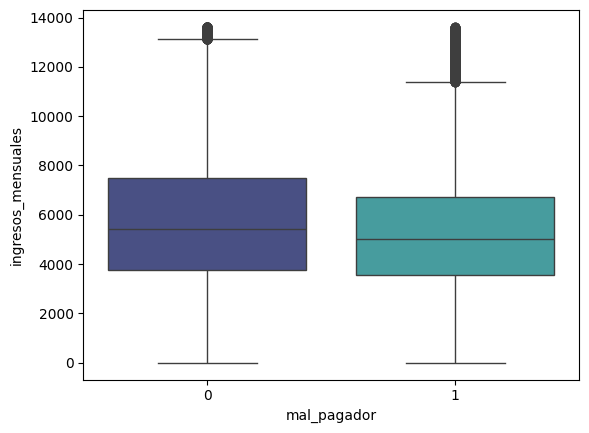

In [12]:
plt.style.use('default')
Q1 = cp_final['ingresos_mensuales'].quantile(0.25)
Q3 = cp_final['ingresos_mensuales'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = cp_final[(cp_final['ingresos_mensuales'] >= limite_inferior) & (cp_final['ingresos_mensuales'] <= limite_superior)]

sns.boxplot(y = df_sin_outliers["ingresos_mensuales"],
            x = df_sin_outliers["mal_pagador"],
            palette = "mako")

C:\Users\acris\AppData\Local\Temp\ipykernel_11280\2895724756.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = df_sin_outliers['ratio_sobreendeudamiento'],


<Axes: xlabel='mal_pagador', ylabel='ratio_sobreendeudamiento'>

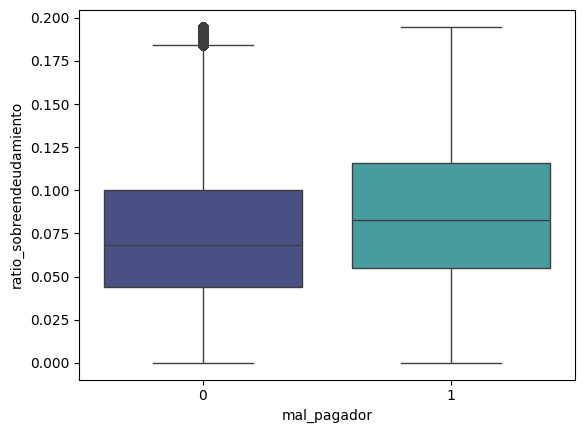

In [13]:
plt.style.use('default')
Q1 = cp_final['ratio_sobreendeudamiento'].quantile(0.25)
Q3 = cp_final['ratio_sobreendeudamiento'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = cp_final[(cp_final['ratio_sobreendeudamiento'] >= limite_inferior) & (cp_final['ratio_sobreendeudamiento'] <= limite_superior)]

sns.boxplot(y = df_sin_outliers['ratio_sobreendeudamiento'],
            x = df_sin_outliers['mal_pagador'],
            palette = "mako")

In [14]:
tabla2 = pd.crosstab(cp_final['purpose'], cp_final['mal_pagador'])
tabla2["ratio_malos"] = tabla2[1]/(tabla2[0]+tabla2[1])
tabla2 = tabla2.sort_values(by='ratio_malos', ascending=False)
tabla2 = tabla2.reset_index()
tabla2

mal_pagador,purpose,0,1,ratio_malos
0,small_business,19804,4838,0.196331
1,renewable_energy,1211,231,0.160194
2,moving,13039,2345,0.152431
3,debt_consolidation,1100600,174295,0.136713
4,medical,23818,3632,0.132313
5,educational,368,56,0.132075
6,other,121544,17671,0.126933
7,house,12382,1736,0.122964
8,vacation,13632,1868,0.120516
9,wedding,2076,279,0.118471


C:\Users\acris\AppData\Local\Temp\ipykernel_11280\1692637644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tabla2['ratio_malos'], y=tabla2["purpose"], palette='mako')


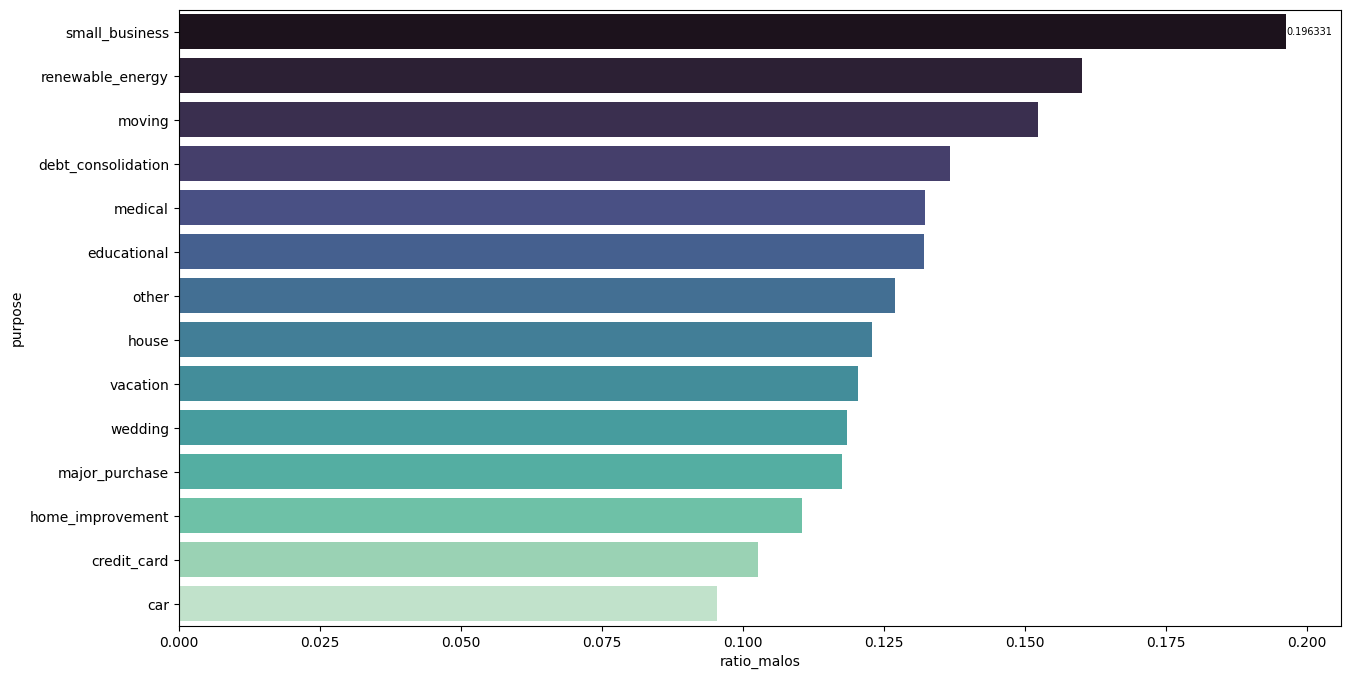

In [15]:
plt.style.use('default')
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=tabla2['ratio_malos'], y=tabla2["purpose"], palette='mako')
ax.bar_label(ax.containers[0], fontsize=7, color='black')  
ax.set_facecolor('white') 
plt.gcf().set_facecolor('white')  
plt.yticks(rotation=0)
plt.show()

In [16]:
cp_final["ratio_deuda_pagada"] = cp_final["total_pymnt"]/(cp_final['loan_amnt'])
cp_final[["total_pymnt","loan_amnt","ratio_deuda_pagada"]]

,total_pymnt,loan_amnt,ratio_deuda_pagada
0,167.020000,2500,0.066808
1,1507.110000,30000,0.050237
2,353.890000,5000,0.070778
3,286.710000,4000,0.071677
4,1423.210000,30000,0.047440
...,...,...,...
2255885,5360.960000,12000,0.446747
2255886,14499.802172,12000,1.208317
2255887,5306.940000,10000,0.530694
2255888,5207.290000,12000,0.433941


C:\Users\acris\AppData\Local\Temp\ipykernel_11280\3863150827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = cp_final["ratio_deuda_pagada"],


<Axes: xlabel='mal_pagador', ylabel='ratio_deuda_pagada'>

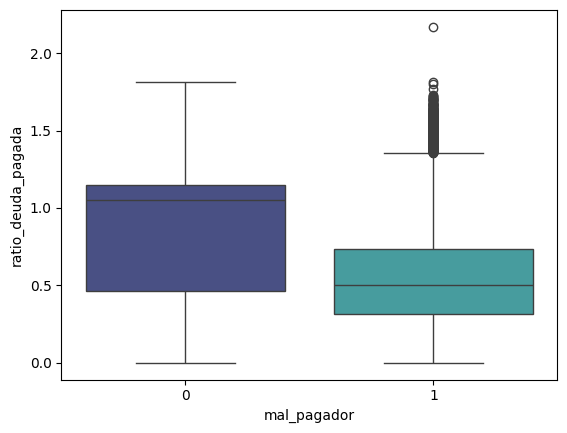

In [17]:
plt.style.use('default')
sns.boxplot(y = cp_final["ratio_deuda_pagada"],
            x = cp_final["mal_pagador"],
            palette = "mako")

In [18]:
correlation_matrix = cp_final[['ingresos_mensuales', 'loan_amnt', 'mths_since_last_delinq', "installment"]].corr()
labels = ['Ingresos_Mensuales', 'Monto del Préstamo', 'Meses_desde_último_vencimiento', "Cuota mensual"]
correlation_matrix


,ingresos_mensuales,loan_amnt,mths_since_last_delinq,installment
ingresos_mensuales,1.000000,0.197059,0.012592,0.190088
loan_amnt,0.197059,1.000000,-0.021002,0.945620
mths_since_last_delinq,0.012592,-0.021002,1.000000,-0.013197
installment,0.190088,0.945620,-0.013197,1.000000


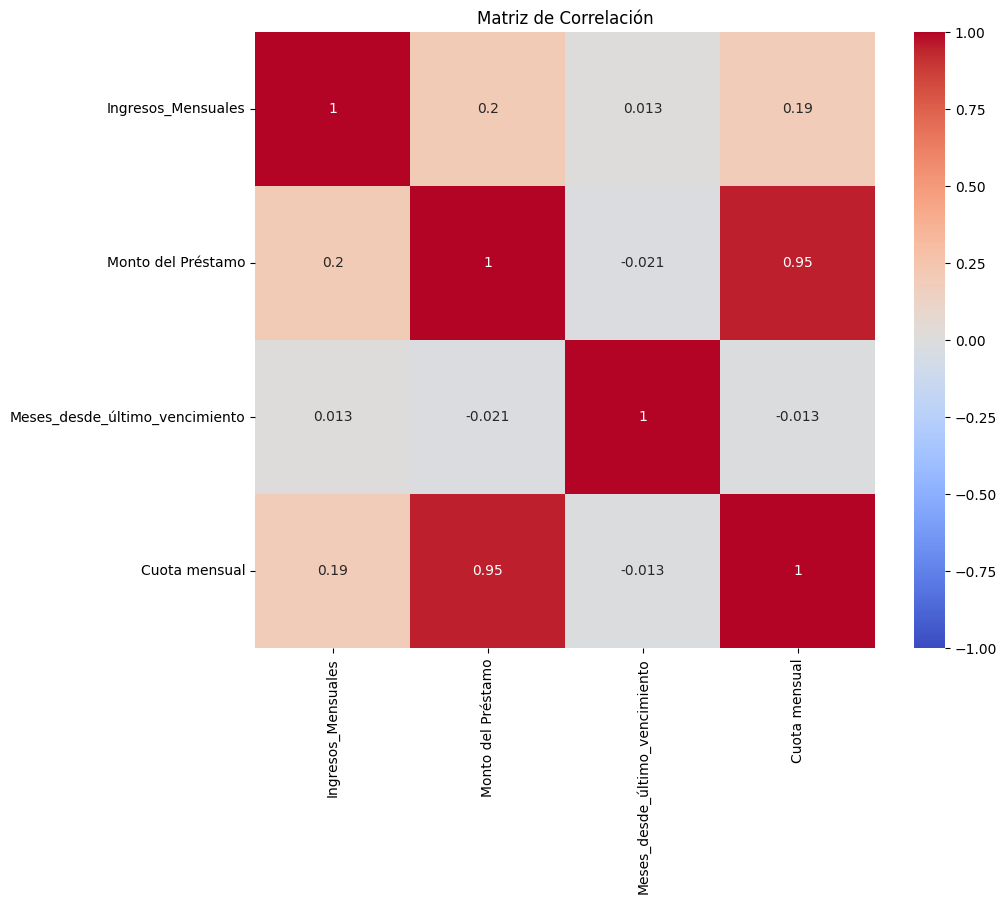

In [19]:
plt.style.use('default')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Correlación")
plt.show()

In [23]:
cp_final['rango_limite_credito'] = pd.qcut(cp_final['tot_hi_cred_lim'], q=4, labels=False)
tabla3 = pd.crosstab(cp_final['rango_limite_credito'], cp_final['mal_pagador'])
tabla3["ratio_malos"] = tabla3[1]/(tabla3[0]+tabla3[1])
tabla3

mal_pagador,0,1,ratio_malos
rango_limite_credito,,,
0.0,465325,81087,0.148399
1.0,469211,77199,0.141284
2.0,480634,65776,0.120378
3.0,496017,50394,0.092227


In [26]:
quartiles = pd.qcut(cp_final['tot_hi_cred_lim'], q=4, labels=False, retbins=True)
quartile_labels = [f'Cuartil {i+1}' for i in range(4)]
cp_final['rango_limite_credito'] = pd.cut(cp_final['tot_hi_cred_lim'], bins=quartiles[1], labels=quartile_labels, include_lowest=True)
tabla4 = pd.crosstab(cp_final['rango_limite_credito'], cp_final['mal_pagador'])
tabla4['ratio_malos'] = tabla4[1] / (tabla4[0] + tabla4[1])
tabla4.index = pd.CategoricalIndex(tabla4.index, categories=quartile_labels, ordered=True)
tabla4

mal_pagador,0,1,ratio_malos
rango_limite_credito,,,
Cuartil 1,465325,81087,0.148399
Cuartil 2,469211,77199,0.141284
Cuartil 3,480634,65776,0.120378
Cuartil 4,496017,50394,0.092227


In [27]:
mean_loan_by_purpose_mal_pagador = cp_final.groupby(['purpose', 'mal_pagador'])['loan_amnt'].mean()
mean_loan_by_purpose_mal_pagador
tabla5 = pd.crosstab(index=cp_final['purpose'], columns=cp_final['mal_pagador'], values=cp_final['loan_amnt'], aggfunc='mean')
pd.options.display.float_format = '{:.2f}'.format
tabla5

mal_pagador,0,1
purpose,,
car,9267.94,10593.87
credit_card,15277.69,15722.49
debt_consolidation,15915.73,16323.13
educational,6425.27,7858.93
home_improvement,14492.85,16103.27
house,15627.72,16280.40
major_purchase,12347.09,15223.66
medical,9348.42,10304.70
moving,8273.01,9071.67


In [28]:
cp_final.loc[cp_final['emp_length'].isnull(), 'emp_length'] = "Sin Trabajo"
tabla6 = pd.crosstab(cp_final['emp_length'], cp_final['mal_pagador'])
tabla6["ratio_malos"] = tabla6[1] / (tabla6[0] + tabla6[1])
tabla6["ratio_malos"].fillna("Sin Trabajo", inplace=True)
tabla6 = tabla6.sort_values(by='ratio_malos', ascending=False)
tabla6 = tabla6.reset_index()
tabla6

C:\Users\acris\AppData\Local\Temp\ipykernel_11280\1847548076.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tabla6["ratio_malos"].fillna("Sin Trabajo", inplace=True)


mal_pagador,emp_length,0,1,ratio_malos
0,Sin Trabajo,124076,22505,0.15
1,8 years,79038,12710,0.14
2,9 years,68601,10624,0.13
3,7 years,80341,12193,0.13
4,1 year,128750,19341,0.13
5,3 years,157566,22840,0.13
6,2 years,177719,25558,0.13
7,5 years,121898,17528,0.13
8,6 years,89571,12837,0.13
9,< 1 year,165930,23737,0.13


In [31]:
cp_final["ingresos_mensuales"].mean()

6499.7739481468525